In [71]:
#data for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#for machine learning 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv('/Users/singhmandeep06gmail.com/Downloads/268833_611395_bundle_archive/AB_NYC_2019.csv')

In [11]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# EDA - Exploratory Data Analysis

In [12]:
# lets check shape and null valus in data set 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [13]:
# lets check the data types 
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

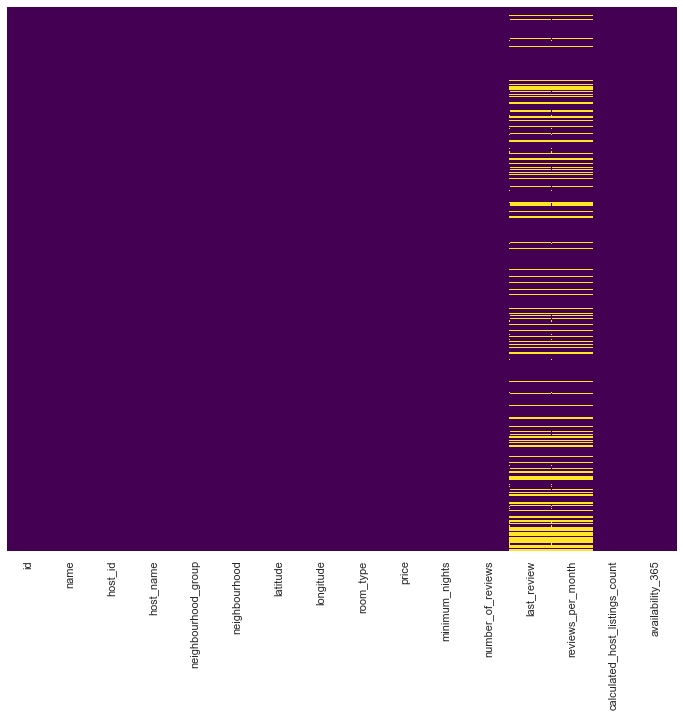

In [14]:
#lets visulize the missing values 

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# most of the missing valuses are in reviews_per_month and name

In [15]:
# getinng some stats 
df.describe().T

#mean price is 152$ for room in NYC 

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


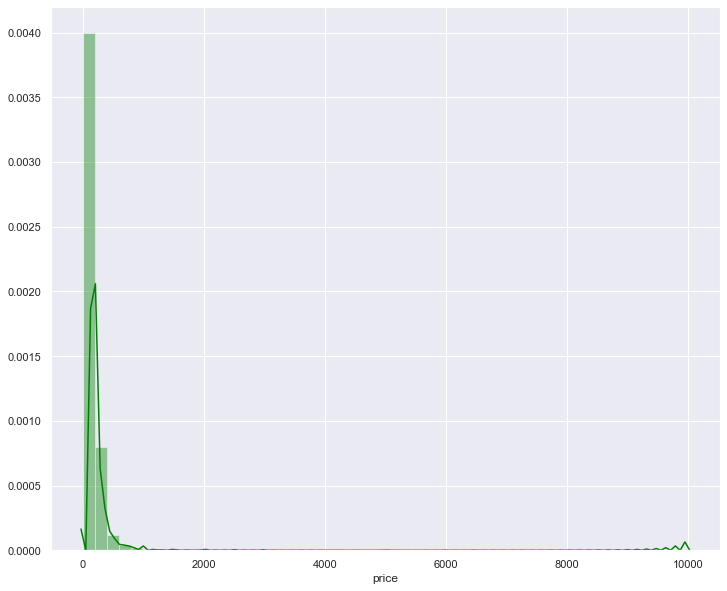

In [16]:
#letts see price distribution 
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(df.price,color= 'green')

In [17]:
#data set under 500
df_500 = df[df.price<500]
df_500.shape

(47660, 16)

Text(0.5, 1.0, 'Locations by borough')

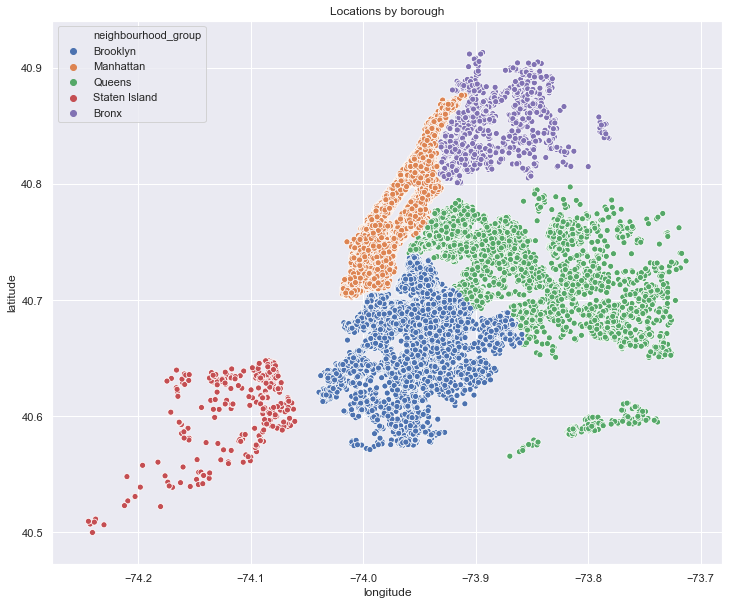

In [18]:
# lets see the Neighbourshood
ax = sns.scatterplot(df.longitude,df.latitude, hue=df.neighbourhood_group)
ax.set_title('Locations by borough')

#staten Island have least listings 

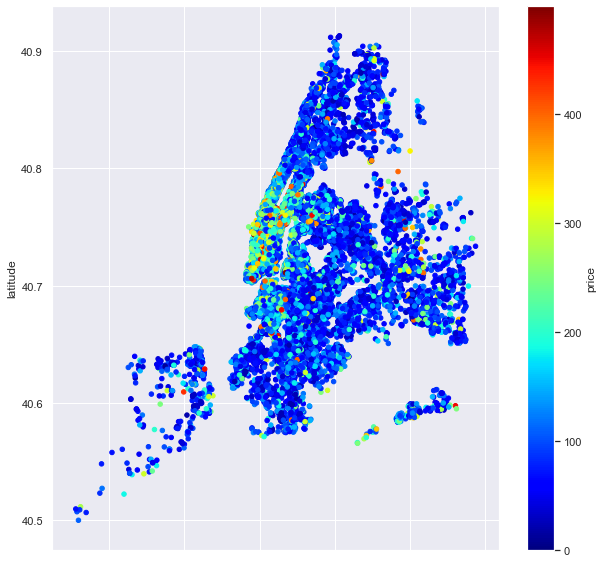

In [19]:
#vizulization of price On NYC map(under 500)

df_500.plot(kind='scatter', x='longitude',y='latitude',c='price',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(10,10))


In [79]:
#lets vizulize the heat map for nyc locstiond
from folium.plugins import HeatMap
NYC_map=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8).add_to(NYC_map)
display(NYC_map)


#broklyn downtown , queens long island city and whole manhatten are busy are areas 

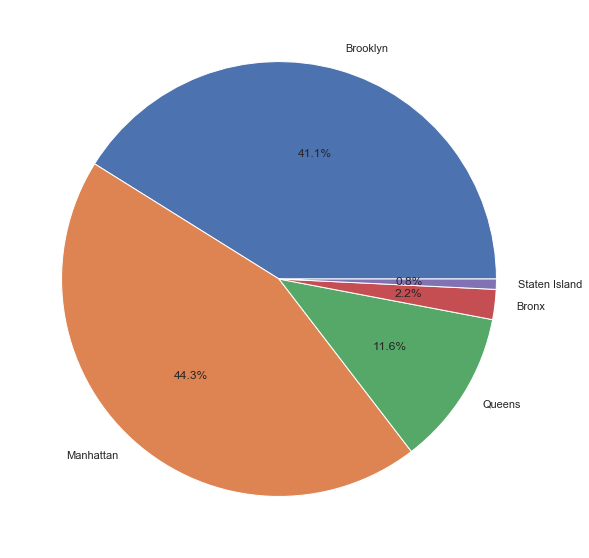

In [21]:
#lets see market share of Boroughs in NYC 
Brok = df[df.neighbourhood_group=='Brooklyn']
man = df[df.neighbourhood_group=='Manhattan']
queen = df[df.neighbourhood_group == 'Queens']
bronx = df[df.neighbourhood_group=='Bronx']
staten = df[df.neighbourhood_group== 'Staten Island']

list_of = {"Brooklyn":len(Brok),'Manhattan':len(man),'Queens':len(queen),'Bronx':len(bronx), 'Staten Island':len(staten)}

plt.pie([float(v) for v in list_of.values()], labels=[k for k in list_of.keys()],autopct='%1.1f%%')
plt.show()

#Manhatten have 44.3% of the Nyc AirBnb market 

Text(0.5, 1.0, 'Average price by room type in Neighbourgrpoups')

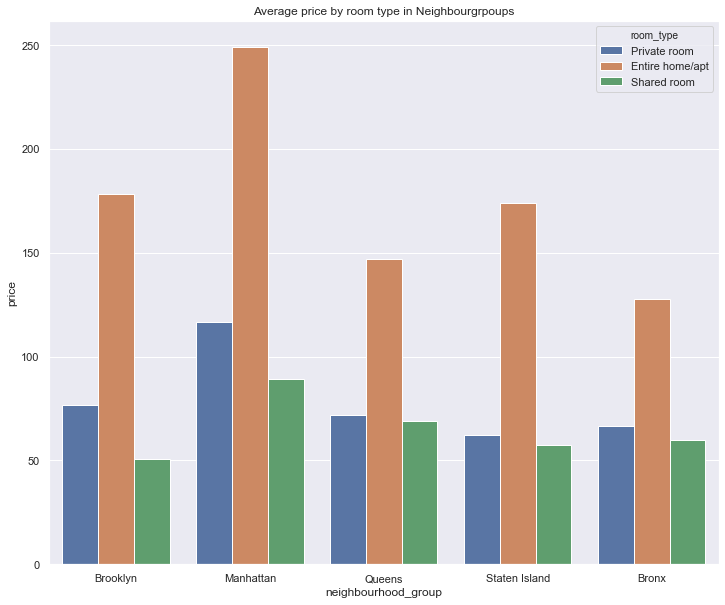

In [22]:
#average price of room type by borough 
ax = sns.barplot(df.neighbourhood_group,df.price,hue=df.room_type,ci=False)
ax.set_title('Average price by room type in Neighbourgrpoups')

In [23]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Density plot for all 5 boroughs ')

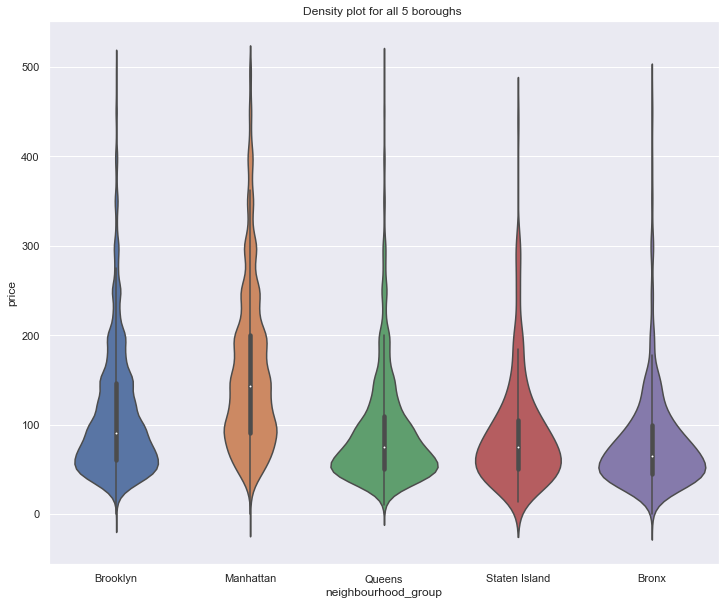

In [24]:
#lets make a data set less then 500
sns.set(rc={'figure.figsize':(12,10)})
ax =sns.violinplot(df_500.neighbourhood_group,df_500.price,data=df_500)
ax.set_title('Density plot for all 5 boroughs ')




Text(0.5, 1.0, 'Boroughs vs price')

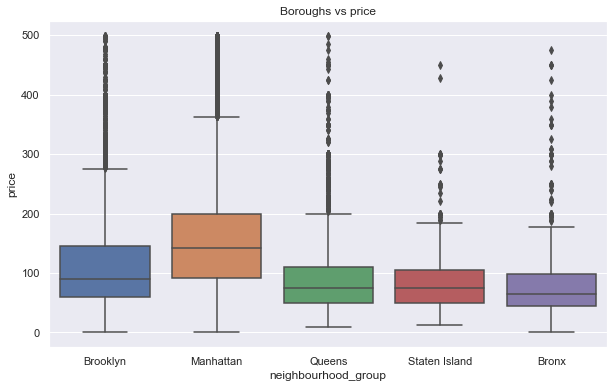

In [25]:
#lets do box plot neighbourhood_group and price
sns.set(rc={'figure.figsize':(12,10)})
plt.figure(figsize=(10,6))
ax =sns.boxplot(df_500.neighbourhood_group,df_500.price,data=df_500)
ax.set_title("Boroughs vs price")


#lots of outlires 
# manhatten is most expensive

Text(0.5, 1.0, 'Room type prices in diffrent neighbourhoods')

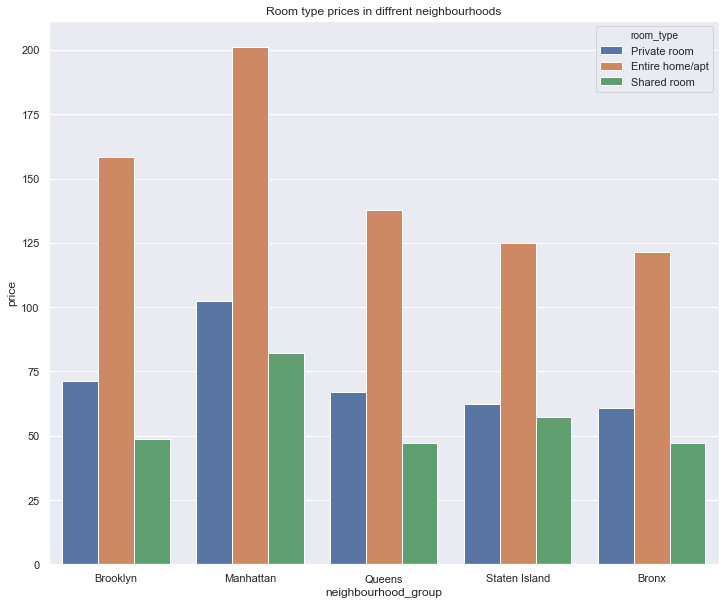

In [26]:
#now lets take a look on room type vs price
ax = sns.barplot(df_500.neighbourhood_group,df_500.price,hue=df_500.room_type,ci=False)
ax.set_title('Room type prices in diffrent neighbourhoods')



# we an see that entire house is more expensive private room 

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        379      9559      13199    2096            176
Private room           652     10132       7982    3372            188
Shared room             60       413        480     198              9


Text(0.5, 1.0, 'Room type avalable in Neighbour_group')

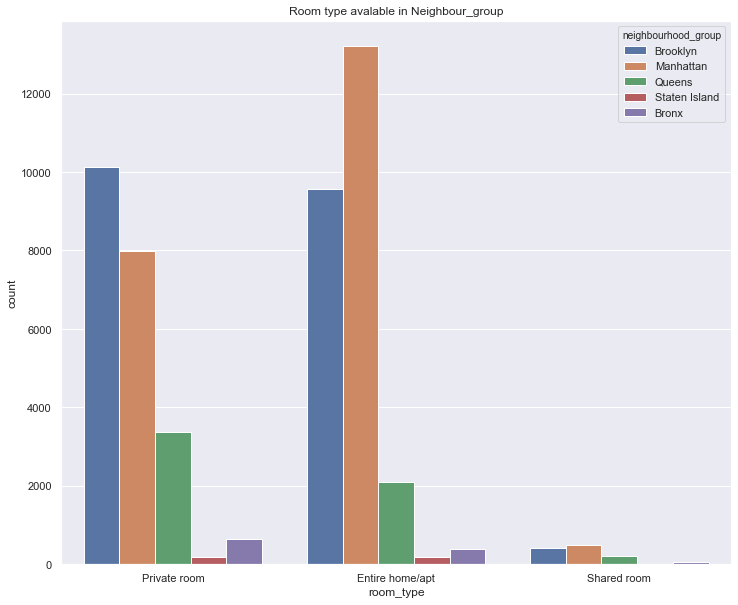

In [27]:
#lets see room type and how many are there 
df_roomtype_count = pd.crosstab(df.room_type,df.neighbourhood_group,dropna=True)
print(df_roomtype_count)

ax = sns.countplot(df.room_type,hue=df.neighbourhood_group)
ax.set_title('Room type avalable in Neighbour_group')

Text(0.5, 1.0, 'Room type vs borough vs minimum night stay')

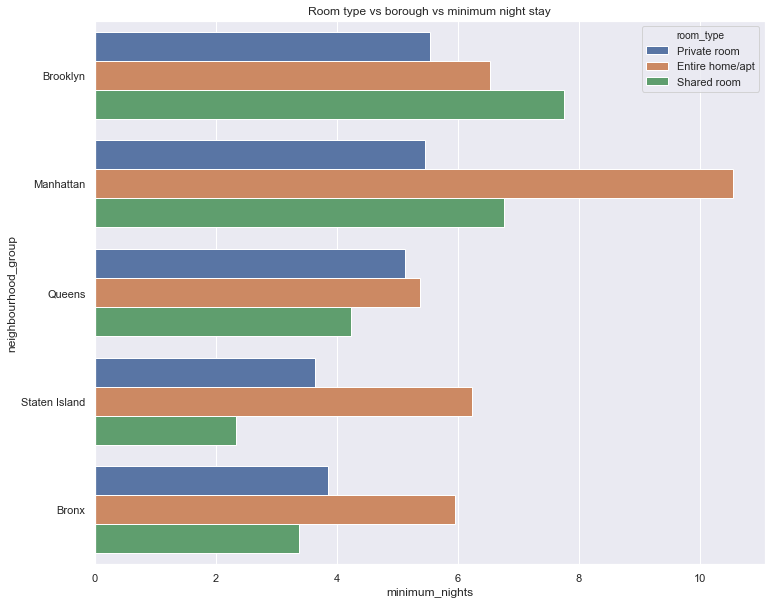

In [28]:
#lets see how many nights people stay at what room type and where
ax= sns.barplot(df.minimum_nights,df.neighbourhood_group,hue=df.room_type,ci=False)
ax.set_title('Room type vs borough vs minimum night stay')

#peple like to stay in entire house in Manhatten,queens,staten island and bronx
# in broklyn people like to stay in shared room

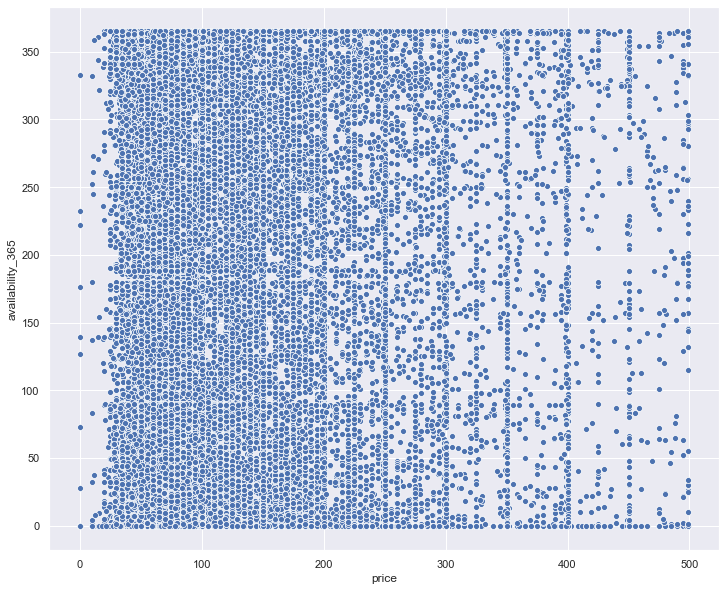

In [29]:
#avalability vs price
ax = sns.scatterplot(df_500.price,df_500.availability_365)

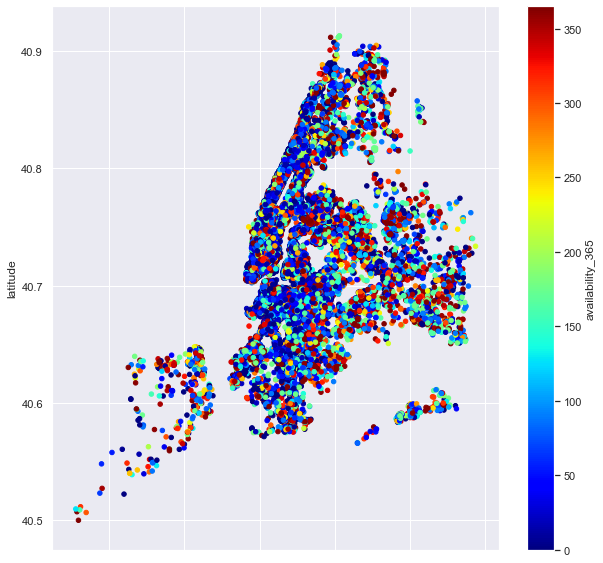

In [30]:
#lets see avalibility on map 

df_500.plot(kind='scatter', x='longitude',y='latitude',c='availability_365',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(10,10))


[Text(0.5, 0, 'Number of rooms/private house avaleble')]

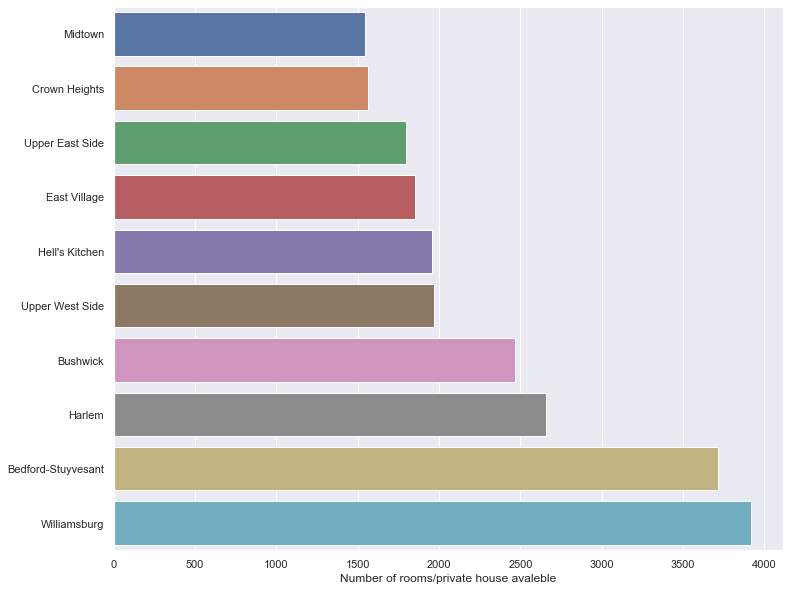

In [31]:
#lets see top 10 neighbourhoods
top_10 =df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values()
ax = sns.barplot(top_10,top_10.index)
ax.set(xlabel="Number of rooms/private house avaleble")

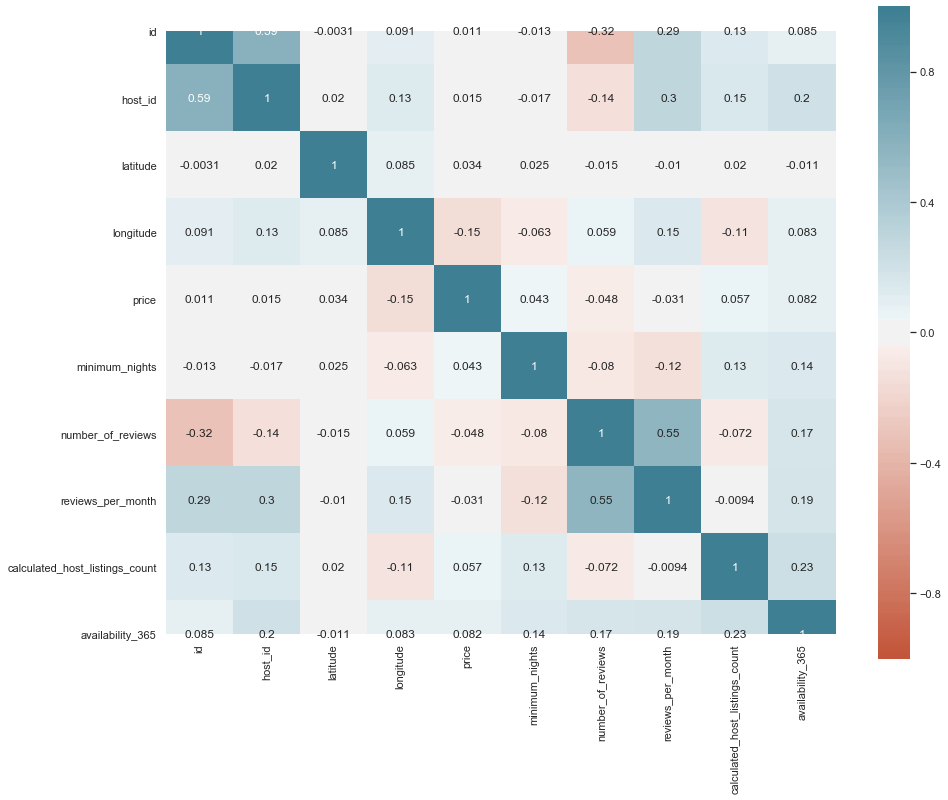

In [32]:
#creat co-relation 
plt.figure(figsize=(15,12))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)

#number of 

In [33]:
#lets log plot the price 
#df['price_log'] = np.log1p(df.price)
#sns.distplot(df['price_log'])

# Lets Clean up data 

In [47]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [35]:
df.drop(['name','id','host_name','last_review'],axis='columns',inplace=True)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [36]:
df_500.drop(['name','id','host_name','last_review'],axis='columns',inplace=True)
df_500.reviews_per_month = df.reviews_per_month.fillna(0)

/Users/singhmandeep06gmail.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/singhmandeep06gmail.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0
neighbourhood,0,0.0


In [39]:
total = df_500.isnull().sum().sort_values(ascending=False)
percent = (df_500.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0
neighbourhood,0,0.0


In [32]:
#lests see how many boroughs it incluses . should be 5 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [33]:
# lets divide the data boroughs because there is huge difference between income  
df_Brok = df[df.neighbourhood_group=='Brooklyn']
df_Man = df[df.neighbourhood_group=='Manhattan']
df_Bron = df[df.neighbourhood_group == 'Bronx']
df_Quee = df[df.neighbourhood_group=='Queens']
df_Stat = df[df.neighbourhood_group=='Staten Island']

# Price predicting with  Machine Learning 

In [50]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [49]:
# lets handel catagorical variable
le = LabelEncoder()

df.neighbourhood_group = le.fit_transform(df.neighbourhood_group)
df.neighbourhood = le.fit_transform(df.neighbourhood)
df.room_type =le.fit_transform(df.room_type)

In [51]:
#target and featurs 
target = df.price
feature = df.drop('price',axis='columns')


In [52]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size =0.3,random_state=42)

In [49]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.score(X_test,y_test)

0.1215680414684206

In [51]:
y_pred = lr.predict(X_test)

In [57]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

188.35472337039826


In [56]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
y_pred_dc = dc.predict(X_test)

In [59]:
print(np.sqrt(mean_squared_error(y_test,y_pred_dc)))

259.23879640581066


In [62]:
lasso = linear_model.Lasso()
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

189.6800936393179


In [ ]:
Ridg = linear_model.Ridge()
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

# hyperparameter tuning



In [74]:
#linear Regression

LR= LinearRegression()

parameters_le = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
LR_grid_search = GridSearchCV(estimator=LR,  
                         param_grid=parameters_le,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_jobs=-1)
LR_grid_search.fit(X_train, y_train)
best_parameters_LR = LR_grid_search.best_params_  
best_score_LR = LR_grid_search.best_score_ 
Lr_predict = LR_grid_search.predict(X_test)
print('-------------------------------')
print(f'best parameter {best_parameters_LR}')
print(f'bestscore   {best_score_LR}')


print('--------------------------------')
print('MAE: %f'% mean_absolute_error(y_test, Lr_predict))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, Lr_predict)))   
print('R2 %f' % r2_score(y_test, Lr_predict))


-------------------------------
best parameter {'copy_X': True, 'fit_intercept': True, 'normalize': True}
bestscore   -59761.26168996729
--------------------------------
MAE: 72.941329
RMSE: 188.354723
R2 0.121568


In [75]:
#lasso
lasso = linear_model.Lasso()

parameters_lasso = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lasso_grid_search = GridSearchCV(estimator=lasso,  
                         param_grid=parameters_lasso,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)
best_parameters_lasso = lasso_grid_search.best_params_  
best_score_lasso = lasso_grid_search.best_score_ 
lasso_predict =lasso_grid_search.predict(X_test)
print('-------------------------------')
print(f'best parameter {best_parameters_lasso}')
print(f'bestscore   {best_score_lasso}')


print('--------------------------------')
print('MAE: %f'% mean_absolute_error(y_test, lasso_predict))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lasso_predict)))   
print('R2 %f' % r2_score(y_test, lasso_predict))

-------------------------------
best parameter {'copy_X': True, 'fit_intercept': True, 'normalize': False}
bestscore   -60328.40734253109
--------------------------------
MAE: 74.226121
RMSE: 189.680094
R2 0.109162


In [76]:
#ElasticNet

ElasticNet = linear_model.ElasticNet()

parameters_EN = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
EN_grid_search = GridSearchCV(estimator=lasso,  
                         param_grid=parameters_EN,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         n_jobs=-1)
EN_grid_search.fit(X_train, y_train)
best_parameters_EN = EN_grid_search.best_params_  
best_score_EN = EN_grid_search.best_score_ 
EN_predict =EN_grid_search.predict(X_test)
print('-------------------------------')
print(f'best parameter {best_parameters_EN}')
print(f'bestscore   {best_score_EN}')


print('--------------------------------')
print('MAE: %f'% mean_absolute_error(y_test, EN_predict))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, EN_predict)))   
print('R2 %f' % r2_score(y_test, EN_predict))

-------------------------------
best parameter {'copy_X': True, 'fit_intercept': True, 'normalize': False}
bestscore   -60328.40734253109
--------------------------------
MAE: 74.226121
RMSE: 189.680094
R2 0.109162
